In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#make sure to install sklearn in your terminal first!
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [4]:
jobs = pd.read_csv('https://raw.githubusercontent.com/DG1606/CMS-R-2020/master/Placement_Data_Full_Class.csv')

college = pd.read_csv('../data/cc_institution_details.csv')

jobs.head()
college.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


# For Placement Data
#### Can we predict salary based on undergrad and postgrad degree type?

## Steps
1. Load in all the data
2. Clean data to remove any missing values
3. Create a function to determine correlation between various variables and salary
4. 

In [5]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:

top = ['Sci&Tech','Comm&Mgmt']
jobs.degree_t = (jobs.degree_t.apply(lambda x: x if x in top else "Other")).astype('category')
jobs.degree_t.value_counts()

degree_t
Comm&Mgmt    145
Sci&Tech      59
Other         11
Name: count, dtype: int64

In [7]:
t2 = ['Mkt&Fin','Mkt&HR']
jobs.specialisation = (jobs.specialisation.apply(lambda x: x if x in t2 else "Other")).astype('category')
jobs.specialisation.value_counts()

specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64

In [8]:

salary_sc = StandardScaler().fit_transform(jobs[['salary']].dropna())
salary_sc[:10]

array([[-0.2002917 ],
       [-0.95183895],
       [-0.41501948],
       [ 1.46384865],
       [-0.3935467 ],
       [-0.61901088],
       [-0.30765559],
       [-0.41501948],
       [-0.75858394],
       [-0.95183895]])

<Axes: ylabel='Density'>

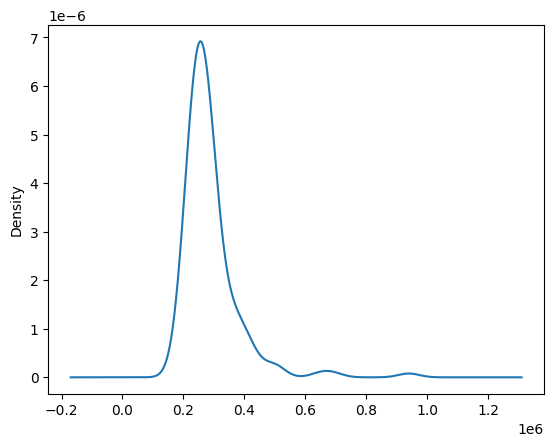

In [9]:
jobs.salary.plot.density()

In [10]:
abc = list(jobs.select_dtypes('number')) #select function to find the numeric variables and create a list  

jobs[abc] = MinMaxScaler().fit_transform(jobs[abc])

In [11]:

category_list = list(jobs.select_dtypes('category')) #select function to find the categorical variables and create a list  

jobs_1h = pd.get_dummies(jobs, columns = category_list) 
jobs_1h

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,workex,etest_p,mba_p,status,salary,degree_t_Comm&Mgmt,degree_t_Other,degree_t_Sci&Tech,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,0.000000,M,0.538240,Others,0.889621,Others,Commerce,0.195122,No,0.104167,0.284483,Placed,0.094595,False,False,True,False,True
1,0.004673,M,0.792414,Central,0.680890,Others,Science,0.670244,Yes,0.760417,0.564843,Placed,0.000000,False,False,True,True,False
2,0.009346,M,0.497011,Central,0.510708,Central,Arts,0.341463,No,0.520833,0.247001,Placed,0.067568,True,False,False,True,False
3,0.014019,M,0.311482,Central,0.247117,Central,Science,0.048780,No,0.333333,0.308096,Not Placed,NaN,False,False,True,False,True
4,0.018692,M,0.925788,Central,0.602965,Central,Commerce,0.568293,No,0.975000,0.160795,Placed,0.304054,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.981308,M,0.818594,Others,0.741351,Others,Commerce,0.673171,No,0.854167,0.872564,Placed,0.270270,True,False,False,True,False
211,0.985981,M,0.352711,Others,0.378913,Others,Science,0.536585,No,0.500000,0.090330,Placed,0.101351,False,False,True,True,False
212,0.990654,M,0.538240,Others,0.494234,Others,Commerce,0.560976,Yes,0.187500,0.693778,Placed,0.128378,True,False,False,True,False
213,0.995327,F,0.682540,Others,0.477759,Others,Commerce,0.195122,No,0.416667,0.338081,Placed,0.005405,True,False,False,False,True


count    148.000000
mean       0.119805
std        0.126294
min        0.000000
25%        0.054054
50%        0.087838
75%        0.135135
max        1.000000
Name: salary, dtype: float64

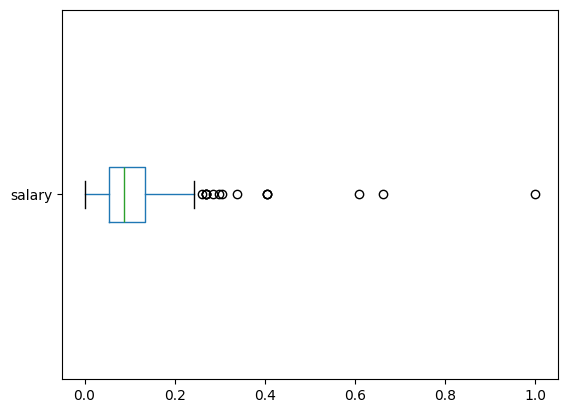

In [12]:
jobs_1h.boxplot(column= 'salary', vert= False, grid=False)
jobs_1h.salary.describe()

In [13]:
jobs_1h['salary_f'] = pd.cut(jobs_1h.salary, bins = [-1, 0.13, 1], labels=[0,1])

In [14]:
prevalence = jobs_1h.salary_f.value_counts()[1]/len(jobs_1h.salary_f)
prevalence

np.float64(0.23255813953488372)

In [15]:
# Drop rows with NaN values in the salary_f column
jobs_1h_clean = jobs_1h.dropna(subset=['salary_f'])

# Perform train-test split
Train, Test = train_test_split(jobs_1h_clean, train_size=55, stratify=jobs_1h_clean.salary_f)

In [16]:
Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.salary_f)

In [17]:
def pre_process_jobs(url):
    jobs = pd.read_csv(url)

    top = ['Sci&Tech','Comm&Mgmt']
    jobs.degree_t = (jobs.degree_t.apply(lambda x: x if x in top else "Other")).astype('category')

    t2 = ['Mkt&Fin','Mkt&HR']
    jobs.specialisation = (jobs.specialisation.apply(lambda x: x if x in t2 else "Other")).astype('category')

    jobs[abc] = MinMaxScaler().fit_transform(jobs[abc])

    jobs_1h = pd.get_dummies(jobs, columns = category_list) 

    jobs_1h['salary_f'] = pd.cut(jobs_1h.salary, bins = [-1, 0.13, 1], labels=[0,1])

    jobs_1h_clean = jobs_1h.dropna(subset=['salary_f'])

    Train, Test = train_test_split(jobs_1h_clean, train_size=55, stratify=jobs_1h_clean.salary_f)

    Tune, Test = train_test_split(Test,  train_size = .5, stratify= Test.salary_f)

    return Train, Tune, Test

pre_process_jobs('https://raw.githubusercontent.com/DG1606/CMS-R-2020/master/Placement_Data_Full_Class.csv')

(        sl_no gender     ssc_p    ssc_b     hsc_p    hsc_b     hsc_s  \
 70   0.327103      M  0.847454   Others  0.395387   Others   Science   
 148  0.691589      F  0.744383  Central  0.807249  Central      Arts   
 43   0.200935      M  0.950526   Others  0.823723   Others  Commerce   
 8    0.037383      M  0.661925  Central  0.691928  Central  Commerce   
 200  0.934579      M  0.579468   Others  0.378913   Others  Commerce   
 116  0.542056      M  0.562977  Central  0.589786  Central  Commerce   
 15   0.070093      F  0.497011  Central  0.626030  Central  Commerce   
 124  0.579439      M  0.538240  Central  0.560132  Central   Science   
 50   0.233645      F  0.707277  Central  0.596376  Central   Science   
 56   0.261682      M  0.455782   Others  0.566722   Others  Commerce   
 67   0.313084      M  0.825191   Others  0.683690   Others  Commerce   
 22   0.102804      F  0.595960   Others  0.392092   Others   Science   
 86   0.401869      M  0.435168   Others  0.428336 

## For College Institution Data

#### Can we predict aid value based on endowment value?

In [18]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  long_x                                3798 non-null   float64
 11  lat_y            

In [19]:
c = list(college.select_dtypes('number')) #select function to find the numeric variables and create a list  

college[c] = MinMaxScaler().fit_transform(college[c])

In [20]:
category1 = list(college.select_dtypes('category')) #select function to find the categorical variables and create a list  

college_1h = pd.get_dummies(college, columns = category1) 
college_1h

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0.000000,0.000000,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,0.407615,0.356098,1.0,0.521127,232937|100724|405997|113607|139533|144005|2285...,0.104348,0.746124,99.7|07,NaN,0.054289
1,0.000263,0.000024,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,0.104348,0.203488,56.0|07,UAB,0.084730
2,0.000527,0.000096,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,0.130435,0.486434,100.0|07,NaN,0.000123
3,0.000790,0.000139,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.000000,0.219512,0.0,0.000000,232186|133881|196103|196413|207388|171128|1900...,0.104348,0.203488,43.1|07,UAH,0.046709
4,0.001053,0.000187,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,0.104348,0.746124,88.0|07,ASU,0.083190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3793,0.998947,0.963263,Grace College of Divinity,Fayetteville,North Carolina,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.365217,0.155039,NaN,NaN,0.000678
3794,0.999210,0.965468,John Paul the Great Catholic University,Escondido,California,4-year,Private not-for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.634783,0.155039,NaN,NaN,0.001972
3795,0.999473,0.977658,Chamberlain College of Nursing-Missouri,St. Louis,Missouri,4-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.165217,0.155039,NaN,NaN,0.000431
3796,0.999737,0.998906,Minneapolis Media Institute,Edina,Minnesota,2-year,Private for-profit,Not applicable- not in Carnegie universe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.034783,0.155039,NaN,NaN,0.008874


count    3797.000000
mean        0.185691
std         0.155492
min         0.000000
25%         0.090200
50%         0.118999
75%         0.219178
max         1.000000
Name: aid_value, dtype: float64

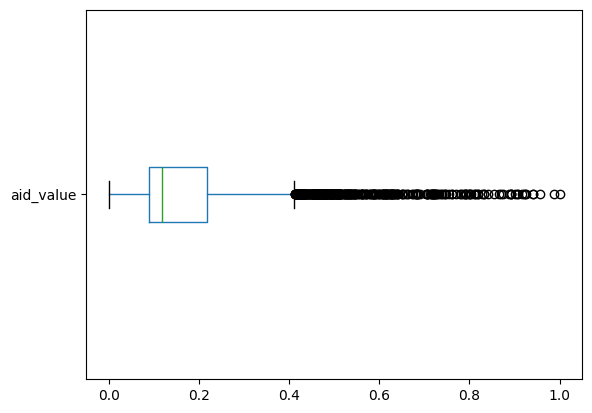

In [22]:
college_1h.boxplot(column= 'aid_value', vert= False, grid=False)
college_1h.aid_value.describe()